In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
# from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# import sklearn

In [2]:
# read dataset
loan = pd.read_csv(r"C:\Users\USER\Desktop\Part_2\15-Decision-Trees-and-Random-Forests\loan_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# check for the data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan.isnull().mean()

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [5]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [6]:
# check the distribution of the class
loan['not.fully.paid'].value_counts(normalize=True) * 100

0    83.994571
1    16.005429
Name: not.fully.paid, dtype: float64

<AxesSubplot:>

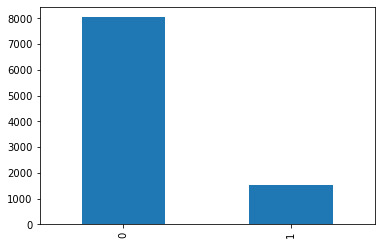

In [7]:
loan['not.fully.paid'].value_counts().plot.bar()

In [8]:
loan['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [9]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
loan_copy = loan.copy()

In [11]:
loan_copy.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
# encode the categorical variables
col = ['purpose']

loan_enc = pd.get_dummies(loan_copy, columns=col, drop_first=True)

loan_enc.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Data Modelling

In [13]:
# declare the independent and dependent variable
x = loan_enc.drop('not.fully.paid', axis=1)
y = loan_enc['not.fully.paid']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [15]:
rf = RandomForestClassifier()

In [16]:
# 
models = []
results = []
names = []

scoring = 'roc_auc'

# append algorithm and names to list
models.append(('RF', RandomForestClassifier()))  
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))


# iterate over algorithms

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score = cross_val_score(model, x_train, y_train, scoring=scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    
    print(f"{name}: {cv_score.mean()}, {cv_score.std()}")




RF: 0.6559531670349716, 0.01761574294467029
DT: 0.5217907997595362, 0.016105744991034576
LR: 0.6242868036986439, 0.026184092172633056
GB: 0.651473796744815, 0.020656317633757172
SVM: 0.5085786969742976, 0.026672426208169245


### Working with a Balanced Dataset

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
!pip install imblearn

In [19]:
sm = SMOTE(random_state=True)

In [20]:
x_res, y_res = sm.fit_resample(x, y)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.15, random_state=101)

In [22]:
print(f"The shape of x_train and y_train before resampling was {x_train.shape} and {y_train.shape} respectively while the shape of x_train and y_train after resampling {x_train_sm.shape} and {y_train_sm.shape}  ")

NameError: name 'x_train_sm' is not defined

In [ ]:
# 
models = []
results = []
names = []

scoring = 'roc_auc'

# append algorithm and names to list
models.append(('RF', RandomForestClassifier()))  
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))


# iterate over algorithms

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score = cross_val_score(model, x_train_sm, y_train_sm, scoring=scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    
    print(f"{name}: {cv_score.mean()}, {cv_score.std()}")




In [ ]:
# 
models = []
results = []
names = []

scoring = 'roc_auc'

# append algorithm and names to list
models.append(('RF', RandomForestClassifier()))  
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))


# iterate over algorithms

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score = cross_val_score(model, x_train, y_train, scoring=scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    
    print(f"{name}: {cv_score.mean()}, {cv_score.std()}")

In [ ]:
# rf = RandomForestClassifier()

# rf.fit(x_train_sm, y_train_sm)

# pred = rf.predict(x_test)

In [ ]:
print(classification_report(pred, y_test))

In [ ]:
print(confusion_matrix(pred, y_test))

In [ ]:
print(round(accuracy_score(pred, y_test)* 100, 2)) 

### Hyperparemeter Tuning

In [ ]:
rf = RandomForestClassifier()


# Randomly select parameters to tune
param_dist = dict(
    n_estimators = [100,200], 
    criterion=["entropy"],
    random_state=[5,10],
    class_weight = ["balanced"],
)

k_range = range(2, 12)

k_score = {}

for k in k_range:
    rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, cv=k, scoring='accuracy', n_iter=10)
    rf_random.fit(x_train, y_train)
    
    k_score.setdefault('Best f1_score', []).append(rf_random.best_score_)
    k_score.setdefault('Best tuned parameter', []).append(rf_random.best_params_)

